<large><h1><center>IIA Design Project SF2</center></h1>
<h1><center>Image Processing</center></h1>

<div class="alert alert-warning">
    
This notebook does _not_ fully replace the PDF handout which describes the original matlab lab.

</div>

<h1>1. Introduction</h1>

This project introduces you to some of the essential design tradeoffs which must be made
during the design of image data compression systems. The main purpose of such systems is
to compress as far as possible the size of the data file required to store an image (typically
a real-world scene) while still preserving the quality of the decompressed image at an
acceptable level. You will be introduced to techniques which to some extent reflect the
compression inherent in the JPEG, JPEG2000 and JPEG-XR standards.

An image compression system normally comprises three main processes:
<ul>
    <li>An input filtering (or transformation) process, which compacts most of the energy
of the image data into a relatively small number of filter output samples;
    <li>A quantisation process, which represents these samples to some desired accuracy;
    <li>A lossless entropy coding process, which codes the quantised samples into the mini-
mum number of bits that still allows the samples to be recovered to their quantised
accuracy in the decompressor.
</ul>

The project introduces you to each of these processes in turn and allows you to make
a number of inter-related design decisions. New concepts are introduced as the project
progresses, rather than introducing too much theoretical material at the beginning. If you
are unsure why you are doing any particular task, then please ask a demonstrator.
At the end of the project all groups will use their final design solutions to compress a
small set of images to given file sizes, and the quality of the reconstructed images will be
assessed in a competition to select the best design.
The final report of the project will be expected to summarise briefly all the investigations
and pay particular attention to the design process as the solution evolves.

# 2. Project Organization

See the PDF handout

# 3. Key Design Stages

See the PDF handout

# 4. Familiarisation

This notebook will provide you with familiarity with some of the functions we will be using frequently in this project. This includes loading data from `.mat` files and plotting images.

As part of installing these notebooks, you should have ended up installing a `cued_sf2_lab` package as described in the readme, from which we will import a variety of helper functions

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from cued_sf2_lab.familiarisation import load_mat_img, plot_image

For help with understanding any of the functions imported above, run `help(function_name)` in a cell such as:

In [21]:
help(load_mat_img)

Help on function load_mat_img in module cued_sf2_lab.familiarisation:

load_mat_img(img, img_info, cmap_info={})
    Load a .mat image into python.
    
    Parameters:
    img (str): .mat file path
    img_info (str): name under which the image matrix is stored
    cmap_info (set of strings): a set of strings indicating names of colormaps
    
    Returns:
    X (numpy.ndarray): image stored in a matrix
    cmaps_dict (dict): Dictionary of numpy.ndarray's of colormaps



Typing `load_mat_img?` in a cell will show you a popup with the help text, while `load_mat_img??` will show you its source code.

<h2>2.1. Loading Data From <i>.mat</i> Files</h2>

We first load data from the matlab file `lighthouse.mat`.

This file contains an image, `X`, and two colormaps, and we provide a convenience function `load_mat_img` to load all of these at once:

Loaded `X` of shape: (256, 256)
Loaded colormaps:


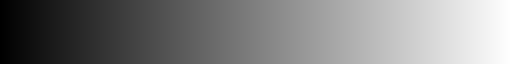

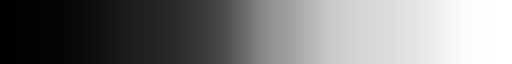

In [22]:
X, cmaps_dict = load_mat_img(img='lighthouse.mat', img_info='X', cmap_info={'map', 'map2'})

print(f'Loaded `X` of shape: {X.shape}')
print('Loaded colormaps:')
display(cmaps_dict['map'])
display(cmaps_dict['map2'])

## 2.2. Plotting Images

In these notebooks we will use the object-oriented plotting API as used in the [Matplotlib tutorial](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py).

Unlike the API you may be familiar with, we must first create a plot using `fig, ax = plt.subplots()`.
This approach lets us produce more flexible plots without having to switch between styles later, and removes any confusion about Jupyter plotting to the wrong cell.

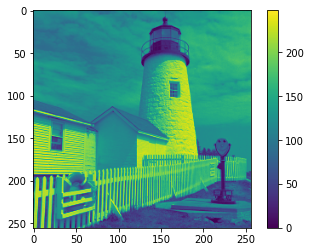

In [23]:
fig, ax = plt.subplots()
im_plot = ax.imshow(X)  # im_plot is needed to tell `colorbar` what to show the colors of
fig.colorbar(im_plot)

By default, `imshow` uses the `viridis` colormap, which draws the brightest pixels in yellow, and the dimmest in dark blue (as shown by `fig.colorbar()`. This is great for visualizing non-photographic data as it has high contrast, but is a distraction here.

For convenience in this project, we provide a `plot_image(X, ax=axs[0])` function which uses a gray colormap, and chooses slightly better axis ticks:

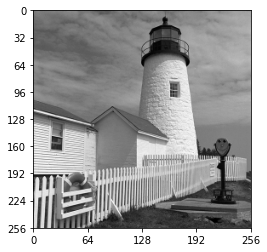

In [24]:
fig, ax = plt.subplots()
plot_image(X, ax=ax);

The `.mat` file came with two colormaps, `map` and `map2`. We can compare these side-by side with

[Text(0.5, 1.0, 'map2')]

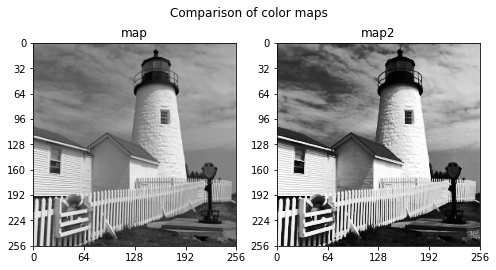

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))  # this demonstrates how to plot multiple figures side-by-side
fig.suptitle('Comparison of color maps')
plot_image(X, ax=axs[0], cmap=cmaps_dict['map'])
axs[0].set(title='map')
plot_image(X, ax=axs[1], cmap=cmaps_dict['map2'])
axs[1].set(title='map2')

Note that `map` is essentially identical to the builtin `gray` that is used by default.

`map2` was generated for this image by a process known as histogram equalisation, which
distorts map so that a histogram of the equalised mapping of the image intensities would
be approximately flat over the full range of grey-scale from black to white (0 to 255).
You may also try some of the [builtin color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html), such as `hot`:

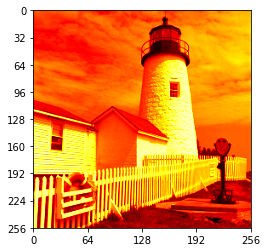

In [26]:
fig, ax = plt.subplots()
plot_image(X, ax=ax, cmap='hot');  # try some other color maps!